
# Reuters Multi-class Classification with Tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

## Loading libraries and datasets

In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


## A Look at Data we got

In [ ]:
print("Words: ", train_data[2])
print("Labels: ", train_labels[2])

Words:  [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2678, 92, 617, 80, 1274, 46, 905, 220, 13, 4, 346, 48, 235, 629, 5, 211, 5, 1118, 7, 2, 81, 5, 187, 11, 15, 9, 1709, 201, 5, 47, 3615, 18, 478, 4514, 5, 1118, 7, 232, 2, 71, 5, 160, 63, 11, 9, 2, 81, 5, 102, 59, 11, 17, 12]
Labels:  3


In [ ]:
# We can access words followed by the above indexes by calling get_word_index
# which returns a dictionary of words and their indexes
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
" ".join([ reversed_word_index.get(i-3, "?") for i in train_data[2]])

565248/550378 [==============================] - 0s 0us/step


'? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in ? corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national ? inc of 11 8 mln and ? corp of 15 6 mln reuter 3'

## Preparing Dataset

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train.shape

(8982, 10000)

In [ ]:
y_train = utils.to_categorical(train_labels) # One hot train labels
y_test = utils.to_categorical(test_labels) # One hot test labels

y_train.shape

(8982, 46)

## Building Model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
# Spliting data further for validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

x_val.shape

(1000, 10000)

In [ ]:
model.compile(optimizer='rmsprop', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 73ms/step - loss: 2.6668 - acc: 0.5299 - val_loss: 1.7621 - val_acc: 0.6330
Epoch 2/20
16/16 [==============================] - 1s 55ms/step - loss: 1.4427 - acc: 0.6927 - val_loss: 1.3297 - val_acc: 0.6970
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0659 - acc: 0.7711 - val_loss: 1.1508 - val_acc: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8385 - acc: 0.8168 - val_loss: 1.0487 - val_acc: 0.7690
Epoch 5/20
16/16 [==============================] - 1s 44ms/step - loss: 0.6666 - acc: 0.8558 - val_loss: 0.9652 - val_acc: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5349 - acc: 0.8887 - val_loss: 0.9525 - val_acc: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4264 - acc: 0.9113 - val_loss: 0.9201 - val_acc: 0.8030
Epoch 8/20
16/16 [==============================] - 1s 43ms/step - loss: 0.3498 - a

In [ ]:
print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f2a6fa5bb90>>


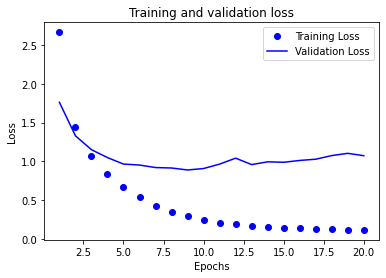

<function matplotlib.pyplot.show>

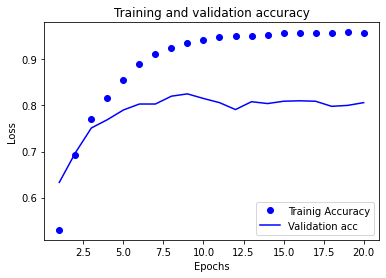

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Trainig Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

## Model Evaluation

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.2099 - acc: 0.7827


[1.2099274396896362, 0.7827248573303223]